In [53]:
import pandas as pd
pd.set_option('mode.use_inf_as_na', True)
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [54]:
df1=pd.read_csv("raw.csv")
#df2=pd.read_csv("data/test.csv")

In [55]:
df_train=pd.DataFrame(df1)
#df_test=pd.DataFrame(df2)

In [56]:
df_train1=df_train.copy()

In [57]:
df_train['Cover_Type'].value_counts()

7    2160
4    2160
2    2160
5    2160
1    2160
3    2160
6    2160
Name: Cover_Type, dtype: int64

In [58]:
categories={0.:'SPRUCE / FIR',1.:'PONDEROSA PINE',2.:'COTTONWOOD / WILLOW',
                    3.:'ASPEN',4.:'DOUGLAS-FIR',5.: 'Krummholz', 6.:'LODGEPOLE PINE'}
output=[3.]
#my_arrat=tuple(output)
#predicted_index = np.argmax(output)
#results = {output: categories}
#print(results)
results=categories[output[0]]
results

'ASPEN'

In [59]:
df_train.iloc[15119]

Id                                               11033
Aspect                                              57
Elevation                                         2448
Hillshade_3pm                                      119
Hillshade_9am                                      228
Hillshade_Noon                                     215
Horizontal_Distance_To_Fire_Points                 808
Horizontal_Distance_To_Hydrology                     0
Horizontal_Distance_To_Roadways                   1100
Slope                                               12
Vertical_Distance_To_Hydrology                       0
Cover_Type                                           6
Wilderness                            Wilderness_Area3
Soil                                       Soil_Type10
Name: 15119, dtype: object

In [60]:
df_train.shape

(15120, 14)

In [61]:
df_train["Cover_Type"].values

array([7, 4, 7, ..., 5, 3, 6], dtype=int64)

In [62]:
df_train.columns

Index(['Id', 'Aspect', 'Elevation', 'Hillshade_3pm', 'Hillshade_9am',
       'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points',
       'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Slope', 'Vertical_Distance_To_Hydrology', 'Cover_Type', 'Wilderness',
       'Soil'],
      dtype='object')

In [63]:
df_train.isna().sum()

Id                                    0
Aspect                                0
Elevation                             0
Hillshade_3pm                         0
Hillshade_9am                         0
Hillshade_Noon                        0
Horizontal_Distance_To_Fire_Points    0
Horizontal_Distance_To_Hydrology      0
Horizontal_Distance_To_Roadways       0
Slope                                 0
Vertical_Distance_To_Hydrology        0
Cover_Type                            0
Wilderness                            0
Soil                                  0
dtype: int64

In [64]:
df_train.describe()

,Id,Aspect,Elevation,Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Slope,Vertical_Distance_To_Hydrology,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,156.676653,2749.322553,135.091997,212.704299,218.965608,1511.147288,227.195701,1714.023214,16.501587,51.076521,4.000000
std,4364.91237,110.085801,417.678187,45.895189,30.561287,22.801966,1099.936493,210.075296,1325.066358,8.453927,61.239406,2.000066
min,1.00000,0.000000,1863.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,-146.000000,1.000000
25%,3780.75000,65.000000,2376.000000,106.000000,196.000000,207.000000,730.000000,67.000000,764.000000,10.000000,5.000000,2.000000
50%,7560.50000,126.000000,2752.000000,138.000000,220.000000,223.000000,1256.000000,180.000000,1316.000000,15.000000,32.000000,4.000000
75%,11340.25000,261.000000,3104.000000,167.000000,235.000000,235.000000,1988.250000,330.000000,2270.000000,22.000000,79.000000,6.000000
max,15120.00000,360.000000,3849.000000,248.000000,254.000000,254.000000,6993.000000,1343.000000,6890.000000,52.000000,554.000000,7.000000


soil_dummy = df_train.loc[:,df_train.columns.str.startswith('Soil_Type')]
wild_dummy=df_train.loc[:,df_train.columns.str.startswith('Wilderness_Area')]
wild = wild_dummy.idxmax(axis=1)
soil = soil_dummy.idxmax(axis=1)
wild.name = 'Wilderness'
soil.name = 'Soil'
df_train['Wilderness']= wild
df_train['Soil'] = soil

df_train.drop(columns=['Wilderness_Area1',
                       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4','Soil_Type7','Soil_Type15',
                       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                        'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
                        'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
                        'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                        'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
                        'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
                        'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
                        'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
                        'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'], axis=1,inplace=True)

In [65]:
df_cat=[feature for feature in df_train.columns if df_train[feature].dtype=='O']
df_num=[feature for feature in df_train.columns if df_train[feature].dtype!='O']
print(df_cat)
print(df_num)

['Wilderness', 'Soil']
['Id', 'Aspect', 'Elevation', 'Hillshade_3pm', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Slope', 'Vertical_Distance_To_Hydrology', 'Cover_Type']


In [66]:
df_train.head()

,Id,Aspect,Elevation,Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Slope,Vertical_Distance_To_Hydrology,Cover_Type,Wilderness,Soil
0,4317,4,3202,149,204,216,3349,60,3550,12,11,7,Wilderness_Area1,Soil_Type23
1,3372,103,2315,6,252,166,365,297,895,37,204,4,Wilderness_Area4,Soil_Type3
2,14340,136,3420,115,242,233,3301,342,3743,15,182,7,Wilderness_Area3,Soil_Type39
3,1584,278,3275,184,197,242,313,60,5461,8,10,2,Wilderness_Area1,Soil_Type38
4,7034,156,2656,133,235,241,700,0,1188,14,0,5,Wilderness_Area3,Soil_Type2


In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Id                                  15120 non-null  int64 
 1   Aspect                              15120 non-null  int64 
 2   Elevation                           15120 non-null  int64 
 3   Hillshade_3pm                       15120 non-null  int64 
 4   Hillshade_9am                       15120 non-null  int64 
 5   Hillshade_Noon                      15120 non-null  int64 
 6   Horizontal_Distance_To_Fire_Points  15120 non-null  int64 
 7   Horizontal_Distance_To_Hydrology    15120 non-null  int64 
 8   Horizontal_Distance_To_Roadways     15120 non-null  int64 
 9   Slope                               15120 non-null  int64 
 10  Vertical_Distance_To_Hydrology      15120 non-null  int64 
 11  Cover_Type                          15120 non-null  in

On careful observation of the data we can initially summarise the following :
1. Numerical data was on Elevation, Slope, Aspect, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points
2. Categorical/nominal/ordinal data can be interferred on Wilderness Area1 - 4 and Soil_Type1 - 40 (total of 44 columns)
3. Output categorical data on Cover_type
4. Vertical_Distance_To_Hydrology has absurd values of -ve and 0. Need proper correction


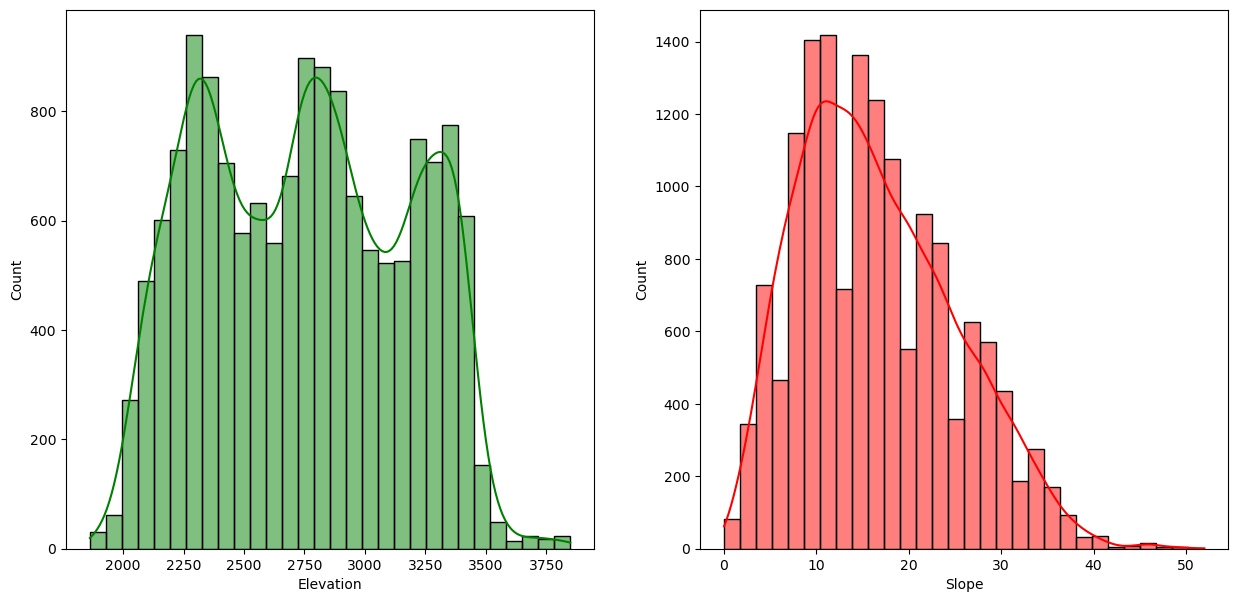

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_train,x=df_train["Elevation"],bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_train,x=df_train["Slope"],kde=True,bins=30,color='r')
plt.show()

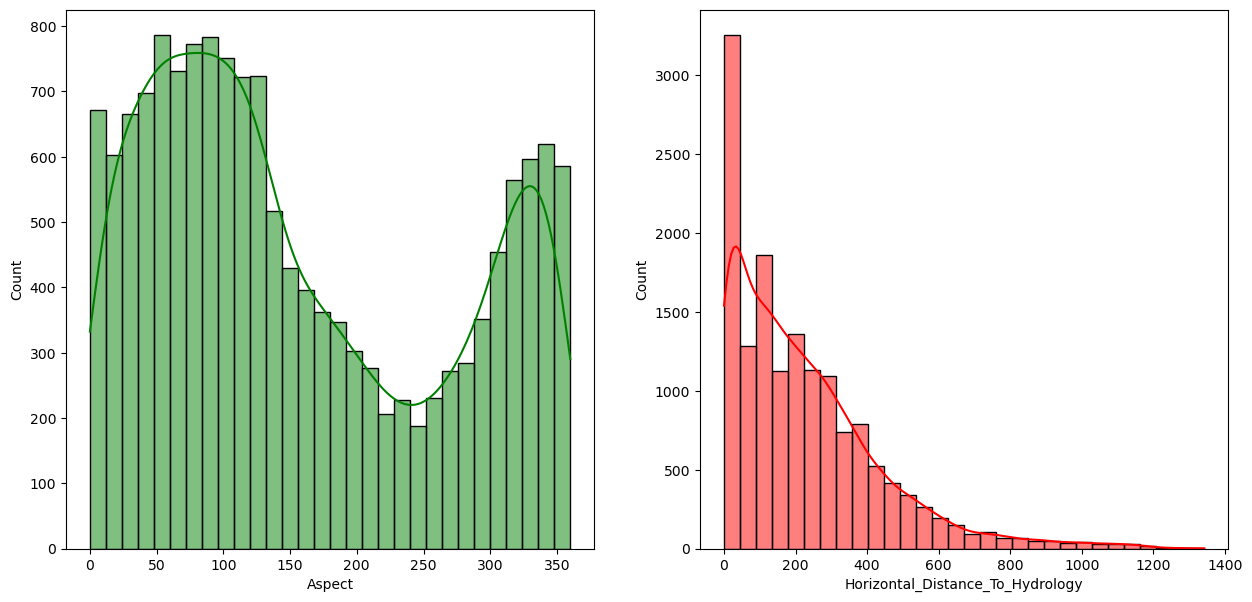

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_train,x=df_train["Aspect"],bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_train,x=df_train["Horizontal_Distance_To_Hydrology"],kde=True,bins=30,color='r')
plt.show()

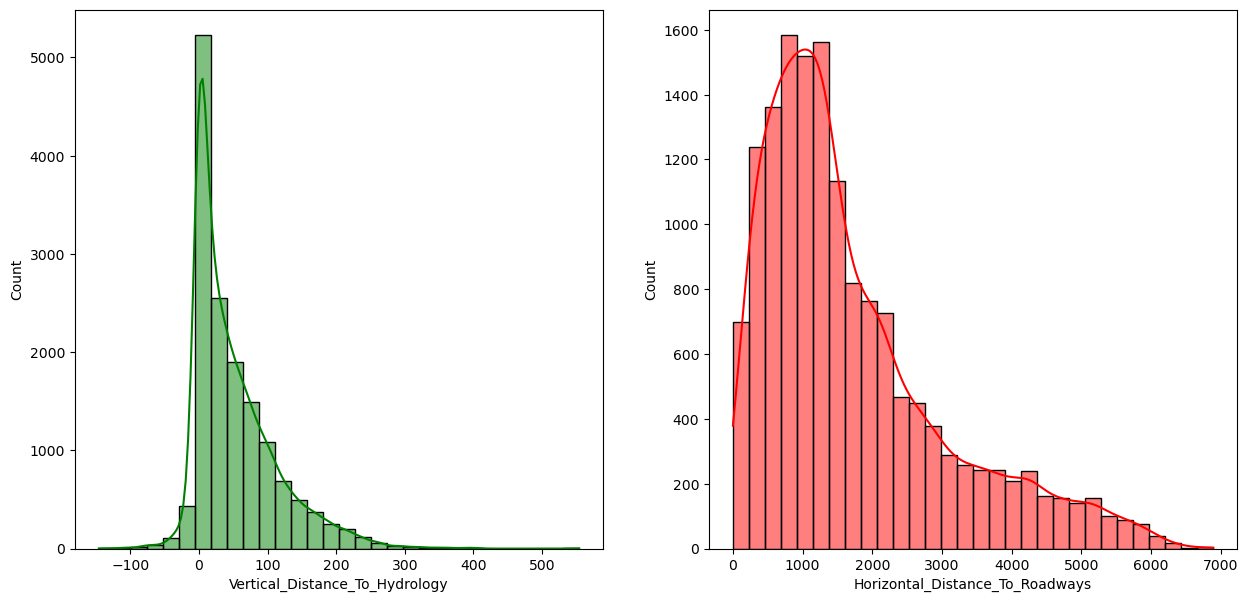

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_train,x=df_train["Vertical_Distance_To_Hydrology"],bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_train,x=df_train["Horizontal_Distance_To_Roadways"],kde=True,bins=30,color='r')
plt.show()

Since there are number of negative values in Vertical_distance_to_Hydrology, and this cannot be negative.
Converting negative into absolute value.
Converting 0 to 1 as on log transfrmation it will be 0 rather convert to -inf
Coverting exixting infinte values to 1. As neative infinite values makes no sense and effects calculations
Converting all -ve infinite to 1. Which on log transformation converts to 0.

In [71]:
#Transformation to absolute values and finite numbers for all -ve , 0 and inifinte values 

df_train["Vertical_Distance_To_Hydrology"]=abs(df_train["Vertical_Distance_To_Hydrology"])
df_train["Vertical_Distance_To_Hydrology"] = np.where(df_train["Vertical_Distance_To_Hydrology"]==0,1,df_train["Vertical_Distance_To_Hydrology"])
df_train["Horizontal_Distance_To_Roadways"] = np.where(df_train["Horizontal_Distance_To_Roadways"]<=0,1,df_train["Horizontal_Distance_To_Roadways"])
df_train["Horizontal_Distance_To_Hydrology"] = np.where(df_train["Horizontal_Distance_To_Hydrology"]<=0,1,df_train["Horizontal_Distance_To_Hydrology"])
df_train["Horizontal_Distance_To_Fire_Points"] = np.where(df_train["Horizontal_Distance_To_Fire_Points"]<=0,1,df_train["Horizontal_Distance_To_Fire_Points"])

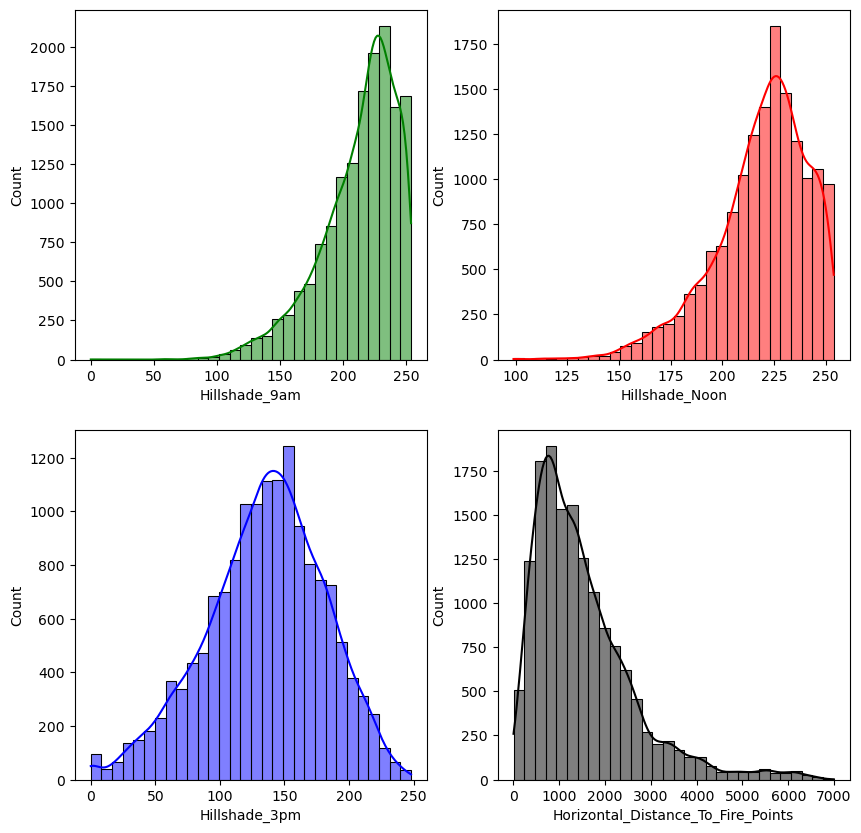

In [72]:
fig, axs = plt.subplots(1, 4, figsize=(10, 10))
plt.subplot(221)
sns.histplot(data=df_train,x=df_train["Hillshade_9am"],bins=30,kde=True,color='g')
plt.subplot(222)
sns.histplot(data=df_train,x=df_train["Hillshade_Noon"],kde=True,bins=30,color='r')
plt.subplot(223)
sns.histplot(data=df_train,x=df_train["Hillshade_3pm"],kde=True,bins=30,color='b')
plt.subplot(224)
sns.histplot(data=df_train,x=df_train["Horizontal_Distance_To_Fire_Points"],kde=True,bins=30,color='k')
plt.show()

From the visuals of distribution of numerical data the following can be be assumed:
All the numerical vsriables except Hillshade_3pm and slope need to be transformed to gaussian distribution by log transformation or any other methodologies.

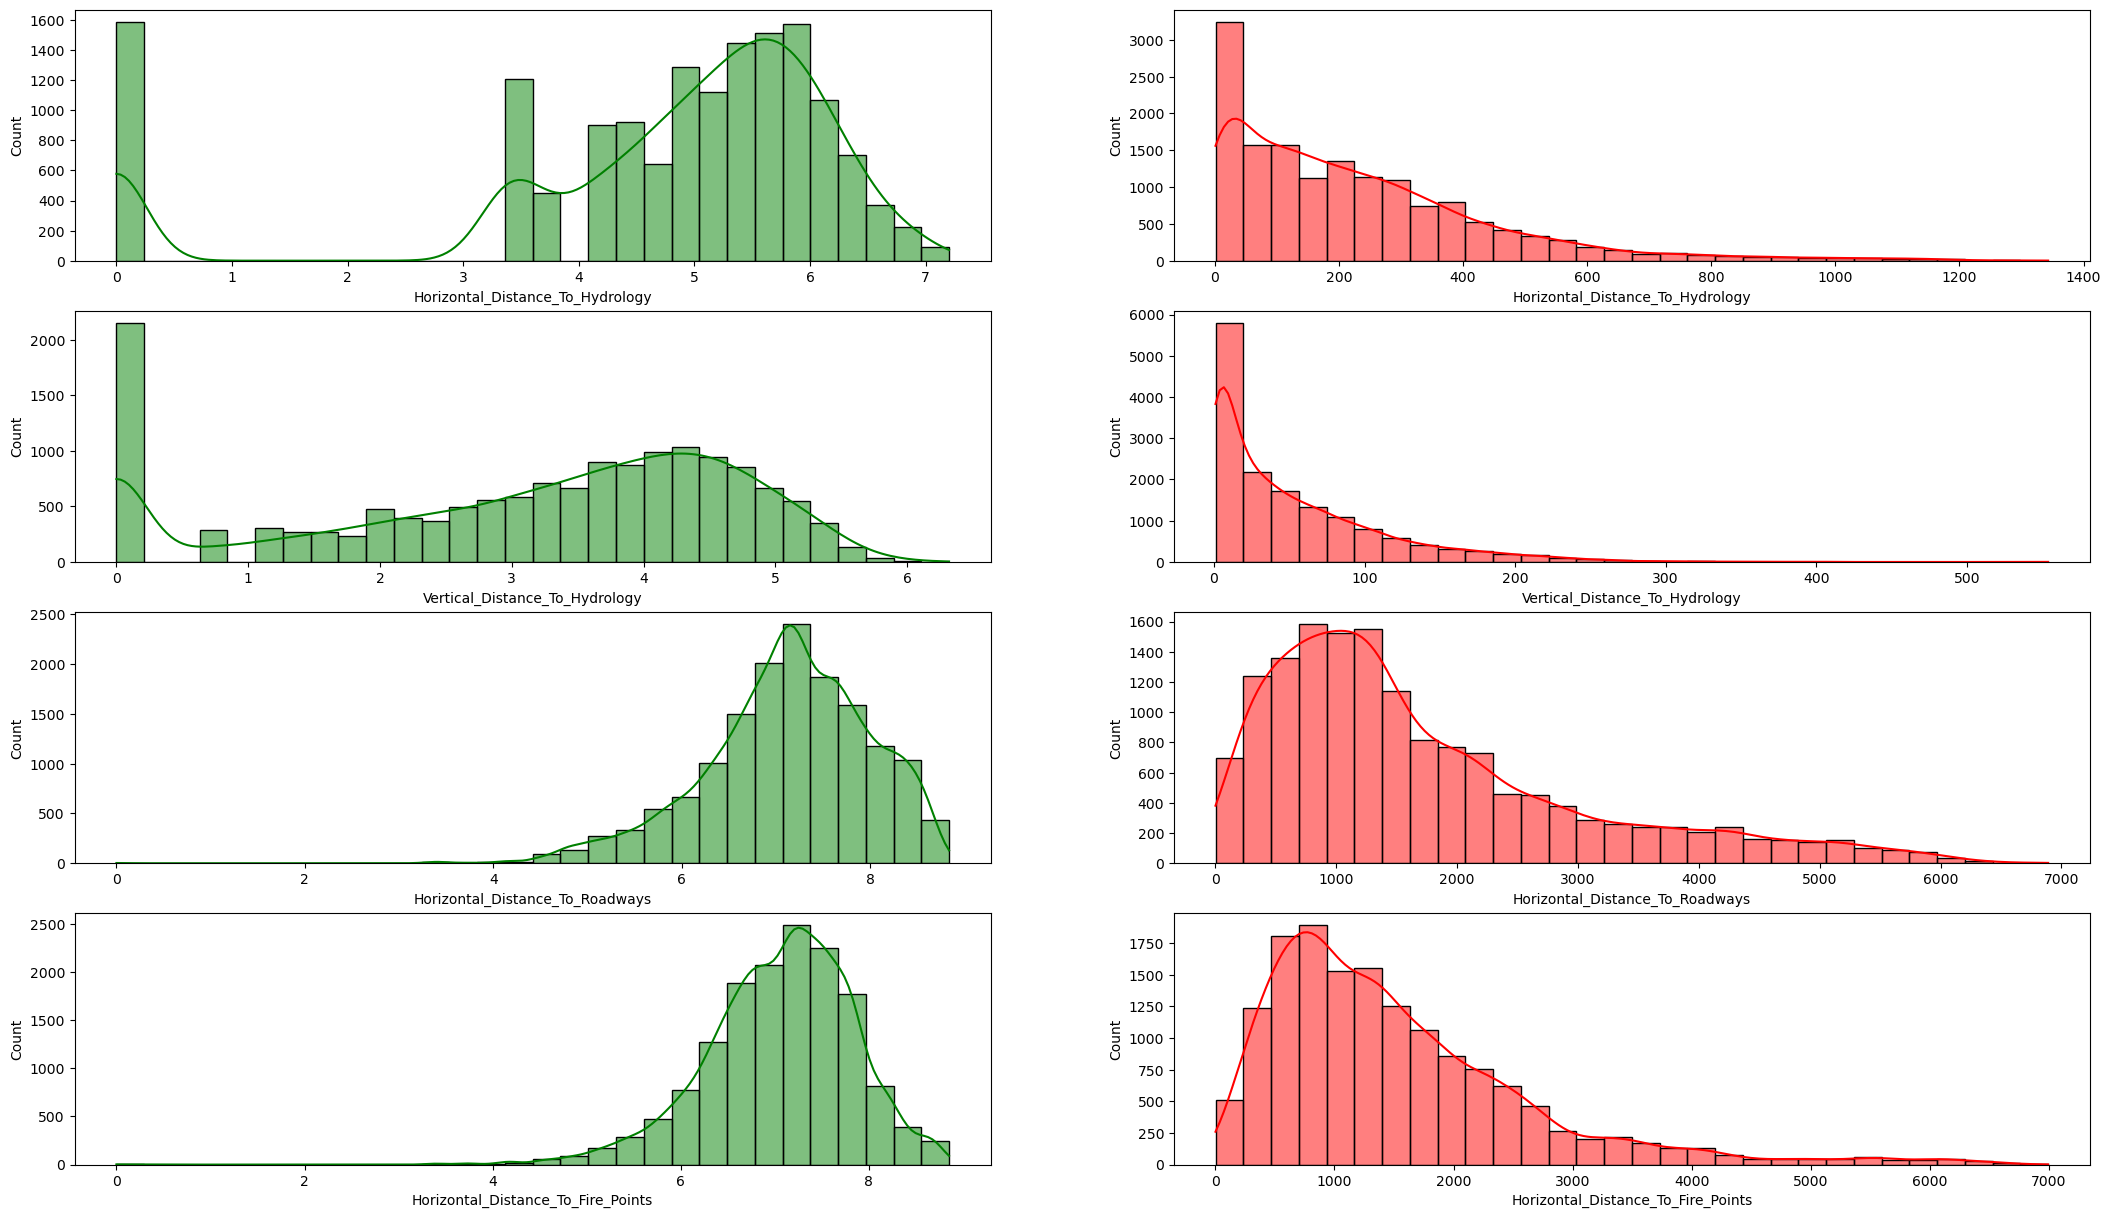

In [73]:
#Converting the right skewed data by log transformation to normal dist: Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,
#Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points

fig, axs = plt.subplots(1, 8, figsize=(26, 15))
plt.subplot(421)
sns.histplot(data=df_train,x=np.log(df_train["Horizontal_Distance_To_Hydrology"]),bins=30,kde=True,color='g')
plt.subplot(422)
sns.histplot(data=df_train,x=(df_train["Horizontal_Distance_To_Hydrology"]),bins=30,kde=True,color='r')

plt.subplot(423)
sns.histplot(data=df_train,x=np.log(df_train["Vertical_Distance_To_Hydrology"]),bins=30,kde=True,color='g')
plt.subplot(424)
sns.histplot(data=df_train,x=(df_train["Vertical_Distance_To_Hydrology"]),bins=30,kde=True,color='r')

plt.subplot(425)
sns.histplot(data=df_train,x=np.log(df_train["Horizontal_Distance_To_Roadways"]),bins=30,kde=True,color='g')
plt.subplot(426)
sns.histplot(data=df_train,x=(df_train["Horizontal_Distance_To_Roadways"]),bins=30,kde=True,color='r')

plt.subplot(427)
sns.histplot(data=df_train,x=np.log(df_train["Horizontal_Distance_To_Fire_Points"]),bins=30,kde=True,color='g')
plt.subplot(428)
sns.histplot(data=df_train,x=(df_train["Horizontal_Distance_To_Fire_Points"]),bins=30,kde=True,color='r')
plt.show()

In [74]:
df_train_copy=df_train.copy()
df_train_copy['Horizontal_Distance_To_Roadways']=np.log(df_train["Horizontal_Distance_To_Roadways"])
df_train_copy['Vertical_Distance_To_Hydrology']=np.log(df_train["Vertical_Distance_To_Hydrology"])
df_train_copy['Horizontal_Distance_To_Hydrology']=np.log(df_train["Horizontal_Distance_To_Hydrology"])

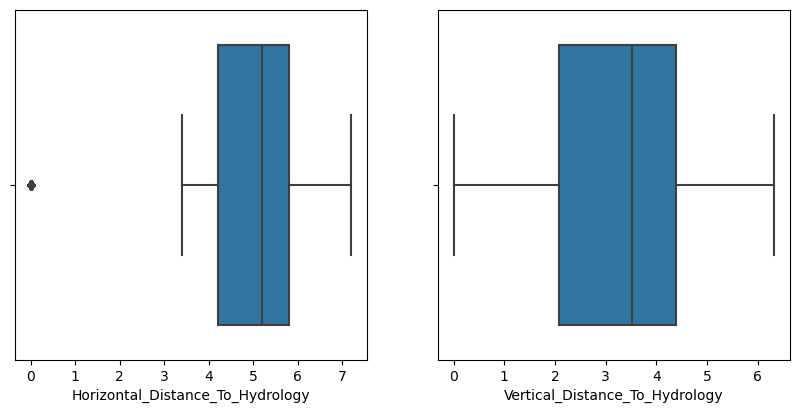

In [75]:

fig, axs = plt.subplots(1, 4, figsize=(10, 10))
plt.subplot(221)
sns.boxplot(data=df_train_copy, x="Horizontal_Distance_To_Hydrology",hue="Cover_Type")
plt.subplot(222)
sns.boxplot(data=df_train_copy, x="Vertical_Distance_To_Hydrology",hue="Cover_Type")
plt.show()

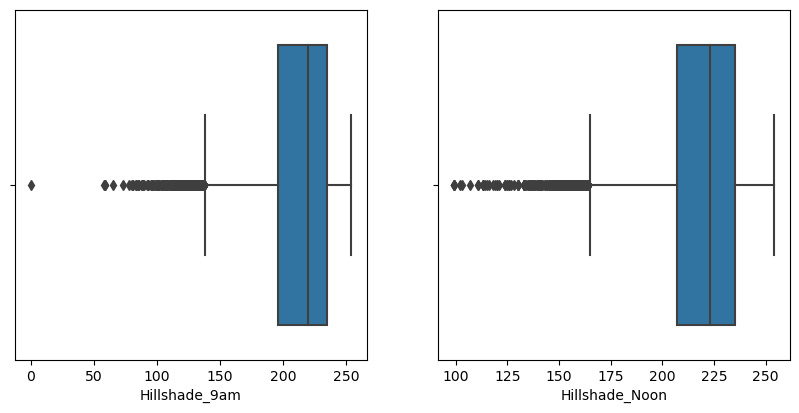

In [76]:
#Hillshade_9am,Hillshade_Noon

fig, axs = plt.subplots(1, 4, figsize=(10, 10))
plt.subplot(221)
sns.boxplot(data=df_train, x="Hillshade_9am",hue="Cover_Type")
plt.subplot(222)
sns.boxplot(data=df_train, x="Hillshade_Noon",hue="Cover_Type")
plt.show()

In [77]:

# finding the 1st quartile
q1 = np.quantile(df_train["Hillshade_9am"], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(df_train["Hillshade_9am"], 0.75)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = (q3+(1.5*iqr))
lower_bound = (q1-(1.5*iqr))
print(iqr, upper_bound, lower_bound)

outliers = df_train["Hillshade_9am"][(df_train["Hillshade_9am"] <= lower_bound) | (df_train["Hillshade_9am"] >= upper_bound)]
#print('The following are the outliers in the boxplot:{}'.format(outliers))

39.0 293.5 137.5


In [78]:
# finding the 1st quartile
q11 = np.quantile(df_train["Hillshade_Noon"], 0.25)
 
# finding the 3rd quartile
q31 = np.quantile(df_train["Hillshade_Noon"], 0.75)
med = np.median(df_train["Hillshade_Noon"])
 
# finding the iqr region
iqr1 = q31-q11
 
# finding upper and lower whiskers
upper_bound1 = (q31+(1.5*iqr1))
lower_bound1 = (q11-(1.5*iqr1))
print(iqr1, upper_bound1, lower_bound1)

28.0 277.0 165.0


In [79]:
#median=(stats.median(df_train['Hillshade_9am']))
df_train["Hillshade_Noon"] = np.where(df_train["Hillshade_Noon"] <=lower_bound1,med,df_train['Hillshade_Noon'])

In [80]:
median=(stats.median(df_train['Hillshade_9am']))
df_train["Hillshade_9am"] = np.where(df_train["Hillshade_9am"] <=lower_bound,median,df_train['Hillshade_9am'])

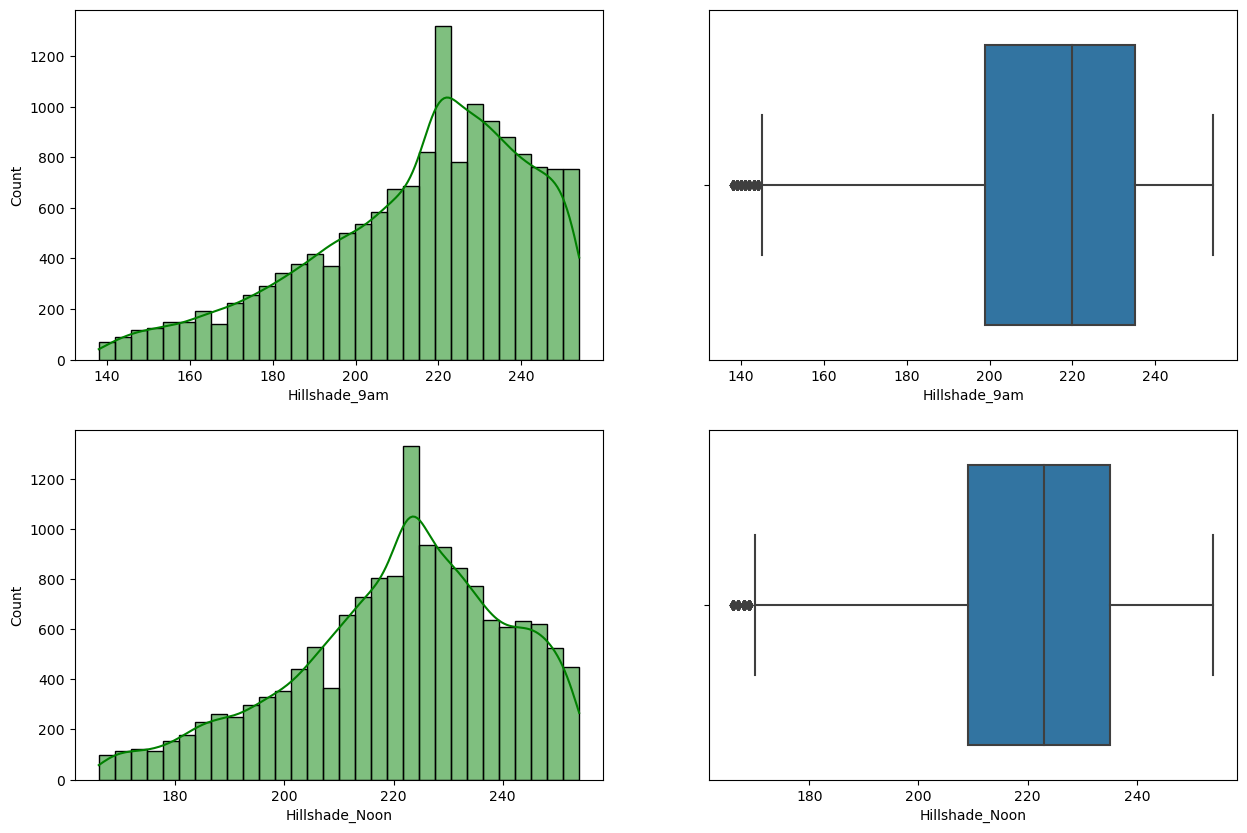

In [81]:
fig, axs = plt.subplots(1, 4, figsize=(15, 10))
plt.subplot(221)
sns.histplot(data=df_train,x=df_train["Hillshade_9am"],bins=30,kde=True,color='g')

plt.subplot(222)
sns.boxplot(data=df_train, x="Hillshade_9am",hue="Cover_Type")

plt.subplot(223)
sns.histplot(data=df_train,x=df_train["Hillshade_Noon"],bins=30,kde=True,color='g')

plt.subplot(224)
sns.boxplot(data=df_train, x="Hillshade_Noon",hue="Cover_Type")
plt.show()

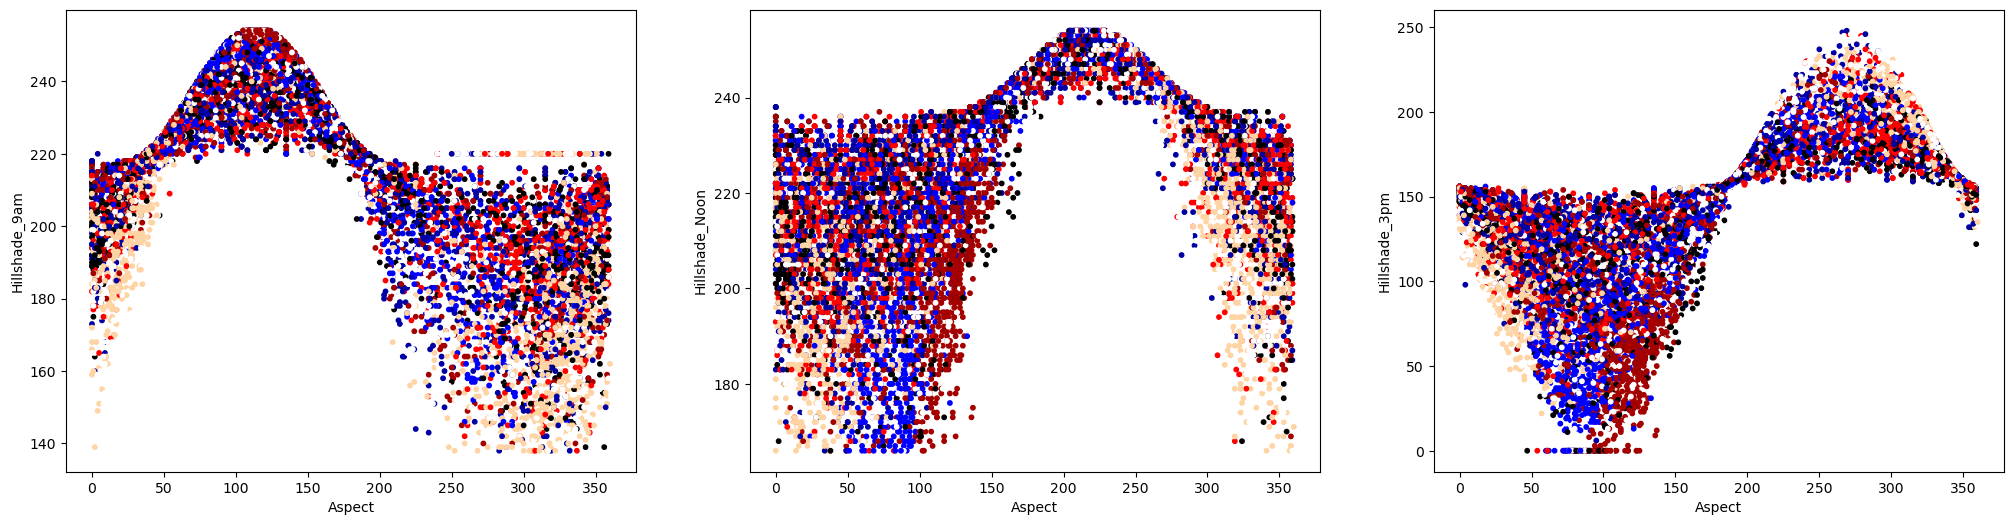

In [82]:
classes = np.array(list(df_train.Cover_Type.values))

def plotRelation(first_feature, sec_feature,cmap='flag'):
    plt.scatter(first_feature, sec_feature, c = classes, s=10,cmap=cmap)
    plt.xlabel(first_feature.name)
    plt.ylabel(sec_feature.name)
    
f = plt.figure(figsize=(25,6))
f.add_subplot(131)
plotRelation( df_train.Aspect,df_train.Hillshade_9am)
f.add_subplot(132)
plotRelation(df_train.Aspect,df_train.Hillshade_Noon)
f.add_subplot(133)
plotRelation(df_train.Aspect,df_train.Hillshade_3pm)

In [83]:
#Converting and inserting the log transformation data in: Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,
#Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points
df_train["Horizontal_Distance_To_Hydrology"]=np.log(df_train["Horizontal_Distance_To_Hydrology"])
df_train["Horizontal_Distance_To_Roadways"]=np.log(df_train["Horizontal_Distance_To_Roadways"])
df_train["Vertical_Distance_To_Hydrology"]=np.log(df_train["Vertical_Distance_To_Hydrology"])
df_train["Horizontal_Distance_To_Fire_Points"]=np.log(df_train["Horizontal_Distance_To_Fire_Points"])

In [84]:
df_train.isna().sum()

Id                                    0
Aspect                                0
Elevation                             0
Hillshade_3pm                         0
Hillshade_9am                         0
Hillshade_Noon                        0
Horizontal_Distance_To_Fire_Points    0
Horizontal_Distance_To_Hydrology      0
Horizontal_Distance_To_Roadways       0
Slope                                 0
Vertical_Distance_To_Hydrology        0
Cover_Type                            0
Wilderness                            0
Soil                                  0
dtype: int64

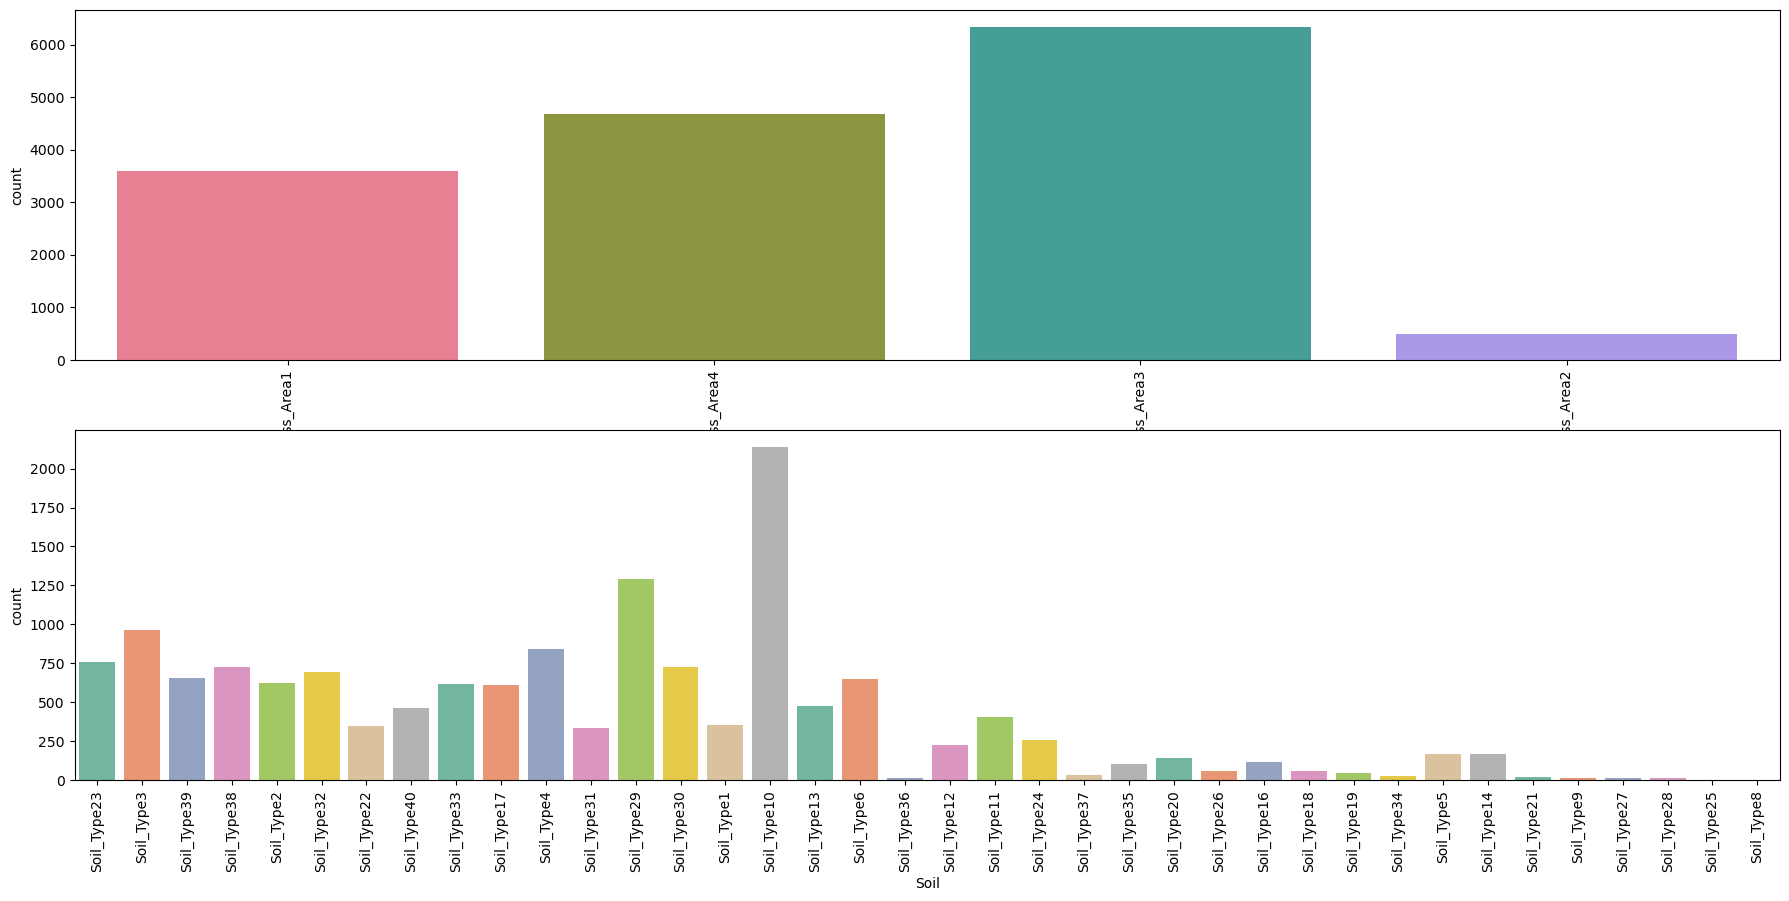

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(22,10))
plt.subplot(211)
sns.countplot(x='Wilderness',data=df_train,palette="husl")
plt.xticks(rotation=90)
plt.subplot(212)
sns.countplot(x='Soil',data=df_train,palette="Set2")
plt.xticks(rotation=90)
plt.show()

In [86]:
df_train.drop(['Id'],axis=1, inplace=True)
#df_train=df_train.drop("Soil_Type7",axis=1, inplace=True)


In [87]:
df_train.shape

(15120, 13)

In [88]:
df_num=[feature for feature in df_train.columns if df_train[feature].dtype!='O']
df_cat=[feature for feature in df_train.columns if df_train[feature].dtype=='O']
print(df_num)
print(df_cat)

['Aspect', 'Elevation', 'Hillshade_3pm', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Slope', 'Vertical_Distance_To_Hydrology', 'Cover_Type']
['Wilderness', 'Soil']


In [89]:
#Segregating the numerical features for heatmap correlation
X_num=df_train[df_num]
X_nm=X_num.iloc[:,:-1]
X_nm.head()

,Aspect,Elevation,Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Slope,Vertical_Distance_To_Hydrology
0,4,3202,149,204.0,216.0,8.116417,4.094345,8.174703,12,2.397895
1,103,2315,6,252.0,166.0,5.899897,5.693732,6.796824,37,5.318120
2,136,3420,115,242.0,233.0,8.101981,5.834811,8.227643,15,5.204007
3,278,3275,184,197.0,242.0,5.746203,4.094345,8.605387,8,2.302585
4,156,2656,133,235.0,241.0,6.551080,0.000000,7.080026,14,0.000000


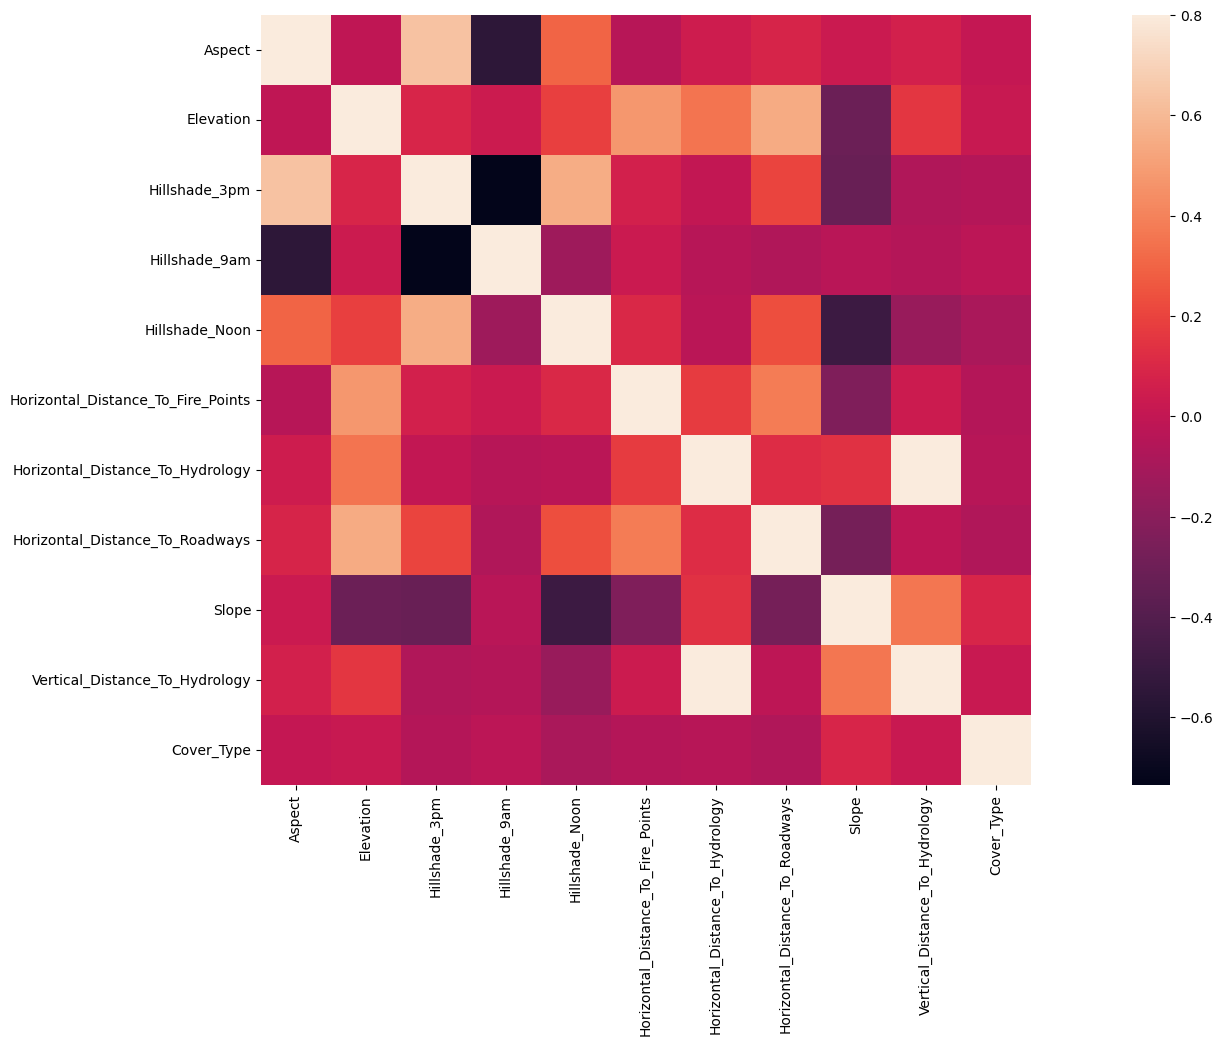

In [90]:
fig, axis = plt.subplots(figsize = (26,10))
sns.heatmap(X_num.corr(),vmax=0.8,square=True)
plt.show()

Some Low Correlation is observed as follows:
1. Hillshade_9am and Hillshade_3pm
2. Hillshade_9am and Aspect
3. Hillshade_noon and slope
4. Horizontal_Distance_To_roadways, Elevation and Slope

High correlation is observed on:
1. Vertical_distance_to_hydrology and Horizontal_distance_hydrology (corr=0.81)

In [91]:
X_num.corr()

,Aspect,Elevation,Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Slope,Vertical_Distance_To_Hydrology,Cover_Type
Aspect,1.000000,-0.011096,0.635022,-0.555086,0.299228,-0.045379,0.043321,0.085855,0.028148,0.066759,0.008015
Elevation,-0.011096,1.000000,0.089518,0.035442,0.183919,0.470549,0.354252,0.545762,-0.312640,0.154996,0.016090
Hillshade_3pm,0.635022,0.089518,1.000000,-0.735075,0.549132,0.062791,0.002220,0.204949,-0.326887,-0.069114,-0.053399
Hillshade_9am,-0.555086,0.035442,-0.735075,1.000000,-0.134461,0.030895,-0.041074,-0.064102,-0.033929,-0.052426,-0.024727
Hillshade_Noon,0.299228,0.183919,0.549132,-0.134461,1.000000,0.104216,-0.031857,0.231611,-0.489429,-0.151040,-0.089084
Horizontal_Distance_To_Fire_Points,-0.045379,0.470549,0.062791,0.030895,0.104216,1.000000,0.170507,0.374659,-0.238731,0.035106,-0.054111
Horizontal_Distance_To_Hydrology,0.043321,0.354252,0.002220,-0.041074,-0.031857,0.170507,1.000000,0.117756,0.137178,0.810311,-0.042538
Horizontal_Distance_To_Roadways,0.085855,0.545762,0.204949,-0.064102,0.231611,0.374659,0.117756,1.000000,-0.274297,-0.019522,-0.066568
Slope,0.028148,-0.312640,-0.326887,-0.033929,-0.489429,-0.238731,0.137178,-0.274297,1.000000,0.361256,0.087722
Vertical_Distance_To_Hydrology,0.066759,0.154996,-0.069114,-0.052426,-0.151040,0.035106,0.810311,-0.019522,0.361256,1.000000,0.023629


In [92]:
xxx=pd.get_dummies(df_train[df_cat])

In [93]:
df_train=pd.concat([df_train,xxx],axis=1)

In [94]:
df_train=df_train.drop(columns=['Wilderness','Soil'],axis=1)

In [95]:
X=df_train.drop(columns=['Cover_Type'],axis=1)
y=df_train['Cover_Type']

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [97]:
X_train

,Aspect,Elevation,Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Slope,Vertical_Distance_To_Hydrology,...,Soil_Soil_Type36,Soil_Soil_Type37,Soil_Soil_Type38,Soil_Soil_Type39,Soil_Soil_Type4,Soil_Soil_Type40,Soil_Soil_Type5,Soil_Soil_Type6,Soil_Soil_Type8,Soil_Soil_Type9
4679,0,2235,156,217.0,236.0,6.763885,0.000000,7.349874,1,0.000000,...,0,0,0,0,0,0,0,0,0,0
6634,308,3263,184,190.0,233.0,5.384495,6.198479,6.464588,11,4.394449,...,0,0,0,0,0,0,0,0,0,0
11459,132,2488,62,251.0,209.0,7.257708,4.204693,6.941190,30,3.332205,...,0,0,0,0,1,0,0,0,0,0
15053,346,2372,162,195.0,219.0,7.280008,6.236370,6.770789,13,5.164786,...,0,0,0,0,0,0,0,1,0,0
8222,156,3404,140,232.0,241.0,6.899723,7.037028,8.098643,10,4.007333,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,107,3322,137,230.0,233.0,7.341484,6.173786,8.223627,6,4.477337,...,0,0,0,0,0,1,0,0,0,0
13418,24,2022,134,212.0,212.0,6.042633,5.968708,6.232448,13,3.737670,...,0,0,0,0,0,0,1,0,0,0
5390,47,2884,127,224.0,217.0,7.325808,5.834811,6.739337,10,4.060443,...,0,0,0,0,0,0,0,0,0,0
860,29,2361,115,210.0,195.0,7.017506,0.000000,6.639876,19,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [98]:
from sklearn.preprocessing import LabelEncoder
target_column_name='Cover_Type'
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [99]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

models={
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'xgboost': XGBClassifier(),
    'KNN': KNeighborsClassifier()
}
params={
    "LogisticRegression":{'max_iter':[1000] },
    "RandomForest":{'n_estimators': [8,16,32,64]},
    "KNN":{'n_neighbors':[8,48,52,84]},
    "xgboost":{'n_estimators': [8,16,32,64], 'learning_rate':[0.01,0.01],'max_depth':[3]}
}


In [101]:
from sklearn.model_selection import GridSearchCV
def evaluate_model(X_train,y_train,X_test,y_test,models,param):
    
    report={}

    for i in range(len(list(models))):
        model=list(models.values())[i]
        para=param[list(models.keys())[i]]

        gs = GridSearchCV(model,para,cv=3)
        gs.fit(X_train,y_train)

        model.set_params(**gs.best_params_)
        model.fit(X_train,y_train)
        y_test_pred=model.predict(X_test)
        acc_score_test= accuracy_score(y_test,y_test_pred)
        report[list(models.keys())[i]] = acc_score_test

    return report

In [102]:
model_report:dict=evaluate_model(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,models=models,param=params)
print(model_report)
print("="*32)
best_model_score=max(sorted(model_report.values()))
best_model_name=list(model_report.keys())[list(model_report.values()).index(best_model_score)]
best_model=models[best_model_name]
print(f"The best model performance is for: {best_model_name} and it has accuracy score of : {best_model_score}")
print("="*32)

{'LogisticRegression': 0.7080026455026455, 'RandomForest': 0.8654100529100529, 'xgboost': 0.66005291005291, 'KNN': 0.7771164021164021}
The best model performance is for: RandomForest and it has accuracy score of : 0.8654100529100529


In [103]:
y_test_pred=best_model.predict(X_test)
class_report= classification_report(y_test,y_test_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       419
           1       0.81      0.71      0.75       439
           2       0.83      0.82      0.83       429
           3       0.92      0.97      0.94       431
           4       0.90      0.95      0.93       438
           5       0.84      0.84      0.84       448
           6       0.95      0.98      0.96       420

    accuracy                           0.87      3024
   macro avg       0.86      0.87      0.86      3024
weighted avg       0.86      0.87      0.86      3024



## *** 